# Review: Programming Exercise 06

## Making Wired Connections (Bipartite Graph)

BFS for reference
```
def BFS(start:GraphVertex):
    queue = []
    start.d = 0
    queue.append(start)
    while queue:
        curr = queue.pop(0)
        process_vertex_early(curr.label)
        for v in curr.edges:
            process_edge(curr.label, v.label)
            if v.d == -1: #Unvisited vertex
                v.d = curr.d + 1
                v.parent = curr
                queue.append(v)
        process_vertex_late(curr.label)
```

In [3]:
class Pin:
    def __init__(self):
        self.side = -1
        self.wires = []

def initial_pcb(n:int, wire_list:list)->list:
    pcb = []
    for i in range(n):
        pcb.append(Pin())
    for w in wire_list:
        if 0 <= w[0] < n and 0 <= w[1] < n:
            pcb[w[0]].wires.append(pcb[w[1]])
    return pcb

In [4]:
def is_circuit_wireable(pcb:list)->bool:
    for p in pcb:
        if p.side == -1: #Unvisited pin
            #BFS
            queue = []
            p.side = 0
            queue.append(p)
            while queue:
                curr = queue.pop(0)  #need fix "FIFO"
                for v in curr.wires:
                    if v.side == -1: #Unvisited pin
                        v.side = curr.side ^ 1 #need fix "加1再判斷奇偶 或 與1做bitwise xor"
                        queue.append(v)
                    elif v.side == curr.side : #檢查 v.side 是否跟 curr.side 同一側
                        return False
    return True

In [5]:
#bitwise xor
0 ^ 1, 1 ^ 1, 1 ^ 0, 0 ^ 0

(1, 0, 1, 0)

In [6]:
print(is_circuit_wireable(initial_pcb(5, [[2, 4], [4, 2], [1, 4], [4, 1], [3, 4], [4, 3], [1, 3], [3, 1]])))
#False
print(is_circuit_wireable(initial_pcb(4, [[0, 3], [3, 0], [2, 1], [1, 2], [2, 0], [0, 2]])))
#True
print(is_circuit_wireable(initial_pcb(12, [[1, 9], [9, 1], [9, 2], [2, 9], [11, 0], [0, 11], [8, 2], [2, 8], [10, 5], [5, 10], [1, 6], [6, 1], [5, 1], [1, 5], [5, 9], [9, 5], [6, 8], [8, 6]])))
#False
print(is_circuit_wireable(initial_pcb(3, [[0, 1], [1, 0], [0, 2], [2, 0]])))
#True
print(is_circuit_wireable(initial_pcb(7, [[0, 1], [1, 0], [2, 3], [3, 2], [0, 4], [4, 0]])))
#True

False
True
False
True
True


## Search a Maze

In [7]:
def search_maze(m:list, s:list, e:list)->bool:
    if s == e:
        return True
    m[s[0]][s[1]] = 2 #been passed
    nx, ny = 0, 0 #inital next step coordinates
    SHIFT = ((0, 1), (1, 0), (0, -1), (-1, 0)) #下、右、上、左
    for x,y in SHIFT:
        nx = s[0]+x
        ny = s[1]+y
        if (0 <= nx < len(m) and 0 <= ny < len(m[0])): #判斷nx跟ny在範圍內 x要小於len(m), y要小於len(m[0])
            if (m[nx][ny] == 0): #判斷下個格子沒走過
                if (search_maze(m, [nx,ny], e)): #need fix "以下一格座標[nx,ny]遞迴呼叫search_maze m跟e的參數不變"
                    return True #如果遞迴呼叫成功抵達終點，這裡也要回報成功
    return False #所有可能路徑都走過了，回傳什麼？

In [8]:
m = [[0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 1], [0, 0, 0, 1]]
print(search_maze(m, [2, 1], [2, 0]))
#True
m = [[0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 0, 0]]
print(search_maze(m, [3, 1], [0, 4]))
#False
m = [[1, 0, 0]]
print(search_maze(m, [0, 2], [0, 1]))
#True
m = [[0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0]]
print(search_maze(m, [3, 0], [8, 0]))
#False
m = [[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]]
print(search_maze(m, [3, 2], [1, 5]))
#True

True
False
True
False
True


# Start here 

# Prim's MST

In [1]:
class GraphVertex:
    def __init__(self, label):
        self.label = label
        self.intree = False #Is the vertex in the tree yet?
        self.candidate = None #Candidate mst edge
        self.parent = None #The vertex discovers me
        self.edges = []  #Edges in Adjacency List
    def __str__(self):
        output = f"{self.label}: "
        output += " ".join(f"{self.label}-({e.weight})->{e.destination.label}" \
                           for e in self.edges)
        return output

class GraphEdge:
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight

def initial_graph(n:int, edge_list:list)->list:
    graph = []
    for i in range(n):
        graph.append(GraphVertex(i))
    for e in edge_list:
        if 0 <= e[0] < n and 0 <= e[1] < n:
            e1 = GraphEdge(graph[e[0]], graph[e[1]], e[2])
            graph[e[0]].edges.append(e1)
            e2 = GraphEdge(graph[e[1]], graph[e[0]], e[2])
            graph[e[1]].edges.append(e2)
    return graph

def prim(graph:list)->list:
    mst = []
    for i in range(len(graph)):
        mst.append(GraphVertex(i))
    v = graph[0] #start
    while not v.intree:
        v.intree = True
        for e in v.edges:
            if not e.destination.intree:
                if e.destination.candidate is None or e.destination.candidate.weight > e.weight:
                    e.destination.candidate = e
                    e.destination.parent = v
        dist = float('inf')
        mst_edge = None
        for i in graph:
            if not i.intree and i.candidate is not None and dist > i.candidate.weight:
                dist = i.candidate.weight
                mst_edge = i.candidate
        if mst_edge is not None: #put edge into mst graph
            s = mst_edge.source.label
            d = mst_edge.destination.label
            w = mst_edge.weight
            mst[s].edges.append(GraphEdge(mst[s],mst[d], w))
            mst[d].edges.append(GraphEdge(mst[d],mst[s], w)) #undirected graph
            v = mst_edge.destination
    return mst

edge_list = [[0,1,5],[0,2,7],[0,3,12],[1,4,7],[1,2,9],\
        [2,3,4],[2,4,4],[2,5,3],[3,5,7],[4,5,2],[4,6,5],[5,6,2]]



Original Graph


{(0, 1): Text(-0.600000217068009, -2.1706800923393388e-07, '5'),
 (0, 2): Text(-0.7999988323077561, -0.2999994161538781, '7'),
 (0, 3): Text(-1.7939019014701074e-06, -0.4000000000000001, '12'),
 (1, 4): Text(-0.09999816846102472, 0.2999981684610247, '7'),
 (1, 2): Text(-0.4000003460329029, 0.09999948095064604, '9'),
 (2, 3): Text(0.19999397206120206, -0.2999992465076504, '4'),
 (2, 4): Text(-0.30000089888926595, -5.992595107917609e-07, '4'),
 (2, 5): Text(-1.2120930477754754e-05, -0.10000202015507975, '3'),
 (3, 5): Text(0.7999992208089677, -0.19999922080896804, '7'),
 (4, 5): Text(0.30000711148604764, 0.09999762950465085, '2'),
 (4, 6): Text(0.10000183153897568, 0.3000018315389752, '5'),
 (5, 6): Text(0.39999922080896777, 0.20000077919103176, '2')}

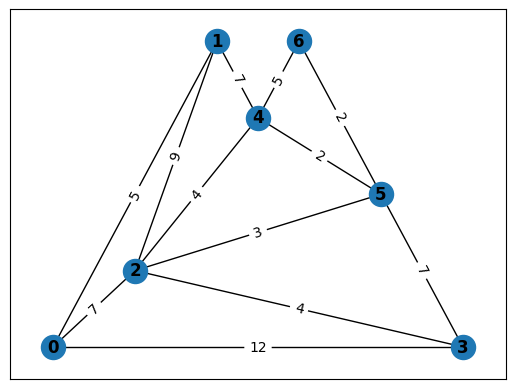

In [2]:
import networkx as nx
graph = nx.Graph()
graph.add_nodes_from(range(6))
for e in edge_list:
    graph.add_edge(e[0],e[1],weight=e[2])
pos=nx.planar_layout(graph)
labels = nx.get_edge_attributes(graph,'weight')
print('Original Graph')
nx.draw_networkx(graph, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

0: 0-(5)->1 0-(7)->2
1: 1-(5)->0
2: 2-(7)->0 2-(3)->5 2-(4)->3
3: 3-(4)->2
4: 4-(2)->5
5: 5-(3)->2 5-(2)->4 5-(2)->6
6: 6-(2)->5
Minimum Spanning Tree


{(0, 1): Text(-0.027779521849071287, -0.38888888888888895, '5'),
 (0, 2): Text(-0.12499419179948745, -0.29166602131105424, '7'),
 (2, 5): Text(0.3611120362119331, -4.625504111954726e-07, '3'),
 (2, 3): Text(0.45833668389241145, 0.09721887166314325, '4'),
 (4, 5): Text(-0.31943753049967594, 0.09722452687047844, '2'),
 (5, 6): Text(-0.1250017806628927, 0.2916684473295593, '2')}

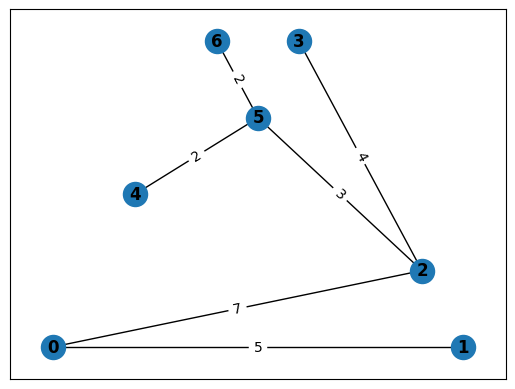

In [3]:
mst = prim(initial_graph(7, edge_list))
for v in mst:
    print(v)


graph_mst = nx.Graph()
graph_mst.add_nodes_from(range(6))
for v in mst:
    for e in v.edges:
        graph_mst.add_edge(e.source.label,e.destination.label,weight=e.weight)
pos=nx.planar_layout(graph_mst)
labels = nx.get_edge_attributes(graph_mst,'weight')
print('Minimum Spanning Tree')
nx.draw_networkx(graph_mst, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(graph_mst,pos,edge_labels=labels)

# Dijkstra's Shortest Path Algorithm

0: 0-(5)->1 0-(7)->2 
1: 1-(5)->0 
2: 2-(7)->0 2-(3)->5 2-(4)->3 2-(4)->4 
3: 3-(4)->2 
4: 4-(4)->2 
5: 5-(3)->2 5-(2)->6 
6: 6-(2)->5 
Shortest Path Spanning Tree


{(0, 1): Text(0.054052357119822814, -0.40540540540540543, '5'),
 (0, 2): Text(-0.04054090918145614, -0.31081085177091256, '7'),
 (2, 5): Text(0.24323220433340054, -0.02702334739041279, '3'),
 (2, 3): Text(0.3378295633356665, 0.06757253226887028, '4'),
 (2, 4): Text(0.43242962783001127, 0.16216496676458292, '4'),
 (5, 6): Text(-0.41891597679539316, 0.06757050969109346, '2')}

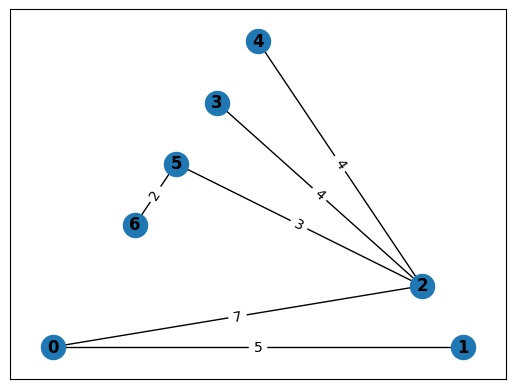

In [ ]:
class GraphVertex:
    def __init__(self, label):
        self.label = label
        self.distance = float('inf') #The distance from start vertex
        self.intree = False #Is the vertex in the tree yet?
        self.candidate = None #Candidate spst edge
        self.parent = None #The vertex discovers me
        self.edges = []  #Edges in Adjacency List
    def __str__(self):
        output = f"{self.label}: "
        for e in self.edges:
            output += f"{self.label}-({e.weight})->{e.destination.label} "
        return output

class GraphEdge:
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight

def initial_graph(n:int, edge_list:list)->list:
    graph = []
    for i in range(n):
        graph.append(GraphVertex(i))
    for e in edge_list:
        if 0 <= e[0] < n and 0 <= e[1] < n:
            graph[e[0]].edges.append(GraphEdge(graph[e[0]], graph[e[1]], e[2]))
            graph[e[1]].edges.append(GraphEdge(graph[e[1]], graph[e[0]], e[2]))
    return graph

def dijkstra(graph:list, start:GraphVertex)->list:
    spst = []
    for i in range(len(graph)):
        spst.append(GraphVertex(i))
    v = start #start vertex
    v.distance = 0
    while not v.intree:
        v.intree = True
        for e in v.edges:
            if not e.destination.intree:
                if e.destination.distance > (e.weight + v.distance):
                    e.destination.distance = e.weight + v.distance
                    e.destination.candidate = e
                    e.destination.parent = v
        dist = float('inf')
        spst_edge = None
        for i in graph:
            if not i.intree and dist > i.distance:
                dist = i.distance
                spst_edge = i.candidate
        if spst_edge is not None: #put edge into spst graph
            s = spst_edge.source.label
            d = spst_edge.destination.label
            w = spst_edge.weight
            spst[s].edges.append(GraphEdge(spst[s],spst[d], w))
            spst[d].edges.append(GraphEdge(spst[d],spst[s], w)) #undirected graph
            v = spst_edge.destination
    return spst

edge_list = [[0,1,5],[0,2,7],[0,3,12],[1,4,7],[1,2,9],\
        [2,3,4],[2,4,4],[2,5,3],[3,5,7],[4,5,2],[4,6,5],[5,6,2]]
graph = initial_graph(7, edge_list)
spst = dijkstra(graph, graph[0])
for v in spst:
    print(v)

import networkx as nx
# graph = nx.Graph()
# graph.add_nodes_from(range(6))
# for e in edge_list:
#     graph.add_edge(e[0],e[1],weight=e[2])
# pos=nx.planar_layout(graph)
# labels = nx.get_edge_attributes(graph,'weight')
# print('Original Graph')
# nx.draw_networkx(graph, pos, with_labels=True, font_weight='bold')
# nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

graph_spst = nx.Graph()
graph_spst.add_nodes_from(range(6))
for v in spst:
    for e in v.edges:
        graph_spst.add_edge(e.source.label,e.destination.label,weight=e.weight)
pos=nx.planar_layout(graph_spst)
labels = nx.get_edge_attributes(graph_spst,'weight')
print('Shortest Path Spanning Tree')
nx.draw_networkx(graph_spst, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(graph_spst,pos,edge_labels=labels)

# Floyd-Warshall's All Pairs Shortest Path Algorithm

00 ,05 ,07 ,11 ,11 ,10 ,12 
05 ,00 ,09 ,13 ,07 ,09 ,11 
07 ,09 ,00 ,04 ,04 ,03 ,05 
11 ,13 ,04 ,00 ,08 ,07 ,09 
11 ,07 ,04 ,08 ,00 ,02 ,04 
10 ,09 ,03 ,07 ,02 ,00 ,02 
12 ,11 ,05 ,09 ,04 ,02 ,00 


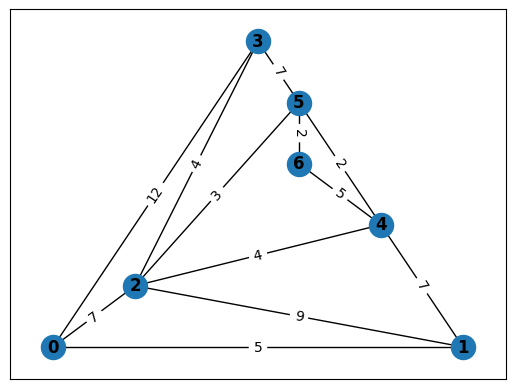

In [ ]:
class GraphVertex:
    def __init__(self, label):
        self.label = label
        self.distance = float('inf') #The distance from start vertex
        self.intree = False #Is the vertex in the tree yet?
        self.candidate = None #Candidate mst edge
        self.parent = None #The vertex discovers me
        self.edges = []  #Edges in Adjacency List
    def __str__(self):
        output = f"{self.label}: "
        for e in self.edges:
            output += f"{self.label}-({e.weight})->{e.destination.label} "
        return output

class GraphEdge:
    def __init__(self, source, destination, weight):
        self.source = source
        self.destination = destination
        self.weight = weight

def initial_graph(n:int, edge_list:list)->list:
    graph = []
    for i in range(n):
        graph.append(GraphVertex(i))
    for e in edge_list:
        if 0 <= e[0] < n and 0 <= e[1] < n:
            graph[e[0]].edges.append(GraphEdge(graph[e[0]], graph[e[1]], e[2]))
            graph[e[1]].edges.append(GraphEdge(graph[e[1]], graph[e[0]], e[2]))
    return graph

def to_adj_matrix(graph:list)->list:
    n = len(graph)
    M = [x[:] for x in [[float('inf')]*n]*n]
    for i in range(n):
        M[i][i] = 0
    for v in graph:
        i = v.label
        for e in v.edges:
            j = e.destination.label
            M[i][j] = e.weight
    return M

def floyd(M:list):
    n = len(M)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if M[i][k] != float('inf') and M[k][j] != float('inf'):
                    M[i][j] = min(M[i][j], M[i][k]+M[k][j])

import networkx as nx
def draw_graph(M:list):
    graph = nx.Graph()
    n = len(M)
    graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if 0 < M[i][j] < float('inf'):
                graph.add_edge(i,j,weight=M[i][j])
    pos=nx.planar_layout(graph)
    labels = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx(graph, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

edge_list = [[0,1,5],[0,2,7],[0,3,12],[1,4,7],[1,2,9],\
        [2,3,4],[2,4,4],[2,5,3],[3,5,7],[4,5,2],[4,6,5],[5,6,2]]
graph = initial_graph(7, edge_list)
adj_M = to_adj_matrix(graph)
draw_graph(adj_M)
floyd(adj_M)
print("\n".join([",".join("%02d "%x for x in row) for row in adj_M]))

# Maximum Flow

In [ ]:
# Returns tne maximum flow from source to sink in the given graph
def max_flow(graph, source, sink)->int:
    flow = 0 # There is no flow initially
    parent = [None]*len(graph) # This array is filled by BFS and to store path

    def BFS(start, target)->bool: # BFS on adjacency matrix
        queue = []
        visited = [False]*len(graph) # Mark all the vertices as not visited
        visited[start] = True
        queue.append(start)
        while queue:
            curr = queue.pop(0)
            for index, weight in enumerate(graph[curr]):
                # find unvisited vertex with edge has capacity
                if visited[index] == False and weight > 0:
                    visited[index] = True
                    parent[index] = curr
                    # If we find a connection to the target(sink) node,
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    if index == target:
                        return True
                    queue.append(index)
        # We didn't reach target in BFS starting from source, so return false
        return False

    # Augment the flow while there is path from source to sink
    while BFS(source, sink):
        # Find minimum residual capacity of the edges along the
        # path filled by BFS. Or we can say find the maximum flow
        # through the path found.
        path_flow = float("Inf")
        s = sink
        path=[]
        while(s !=  source):
            path_flow = min(path_flow, graph[parent[s]][s])
            path.insert(0,s)
            s = parent[s]
        path.insert(0,s)
        print("->".join(str(i) for i in path),", path flow =",path_flow)

        # Add path flow to overall flow
        flow += path_flow

        # update residual capacities of the edges and reverse edges
        # along the path
        v = sink
        while(v !=  source):
            u = parent[v]
            graph[u][v] -= path_flow
            graph[v][u] += path_flow
            v = parent[v]

    return flow

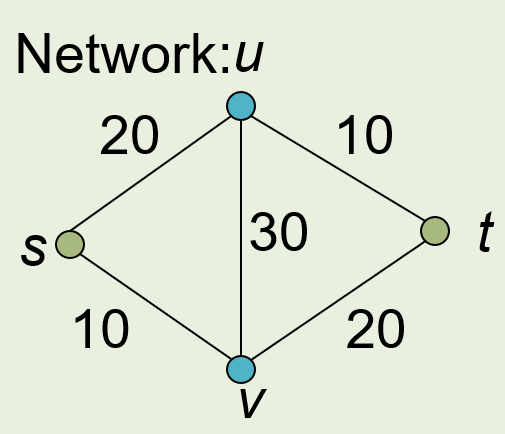

0->1->3 , path flow = 10
0->2->3 , path flow = 10
0->1->2->3 , path flow = 10
The maximum possible flow is  30


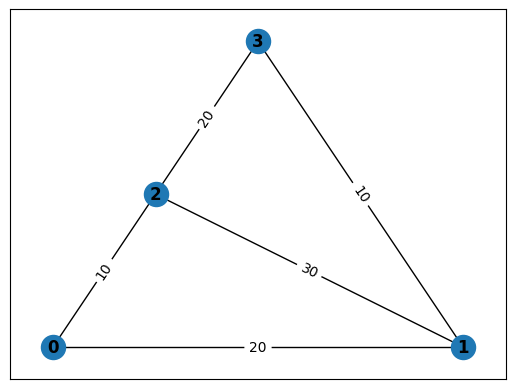

In [ ]:
graph = [[ 0, 20, 10,  0],
         [20,  0, 30, 10],
         [10, 30,  0, 20],
         [ 0, 10, 20,  0]]
draw_graph(graph)
source = 0
sink = 3

print("The maximum possible flow is ", max_flow(graph, source, sink))

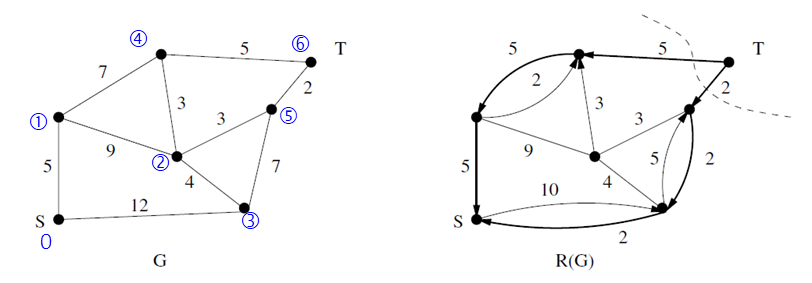

0->1->4->6 , path flow = 5
0->3->5->6 , path flow = 2
The maximum possible flow is  7


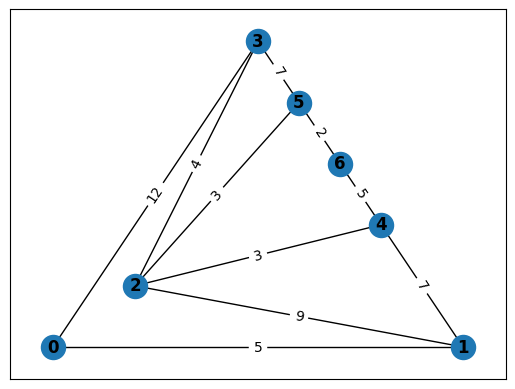

In [ ]:
graph = [[ 0, 5, 0,12, 0, 0, 0],
         [ 5, 0, 9, 0, 7, 0, 0],
         [ 0, 9, 0, 4, 3, 3, 0],
         [12, 0, 4, 0, 0, 7, 0],
         [ 0, 7, 3, 0, 0, 0, 5],
         [ 0, 0, 3, 7, 0, 0, 2],
         [ 0, 0, 0, 0, 5, 2, 0]]
draw_graph(graph)
source = 0
sink = 6

print("The maximum possible flow is ", max_flow(graph, source, sink))

0->1->4->7 , path flow = 1
0->3->4->7 , path flow = 4
0->8->6->7 , path flow = 2
0->8->9->7 , path flow = 1
0->1->2->4->7 , path flow = 2
0->1->2->5->7 , path flow = 1
0->1->3->6->7 , path flow = 1
0->1->3->6->9->7 , path flow = 1
The maximum possible flow is  13


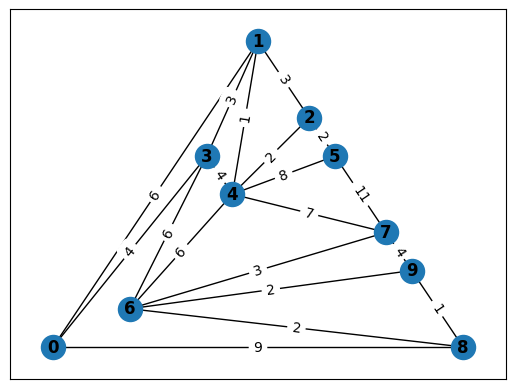

In [ ]:
#          A, B, C, D, E, F, G, H, I, J
graph = [[ 0, 6, 0, 4, 0, 0, 0, 0, 9, 0],
         [ 6, 0, 3, 3, 1, 0, 0, 0, 0, 0],
         [ 0, 3, 0, 0, 2, 2, 0, 0, 0, 0],
         [ 4, 3, 0, 0, 4, 0, 6, 0, 0, 0],
         [ 0, 1, 2, 4, 0, 8, 6, 7, 0, 0],
         [ 0, 0, 2, 0, 8, 0, 0,11, 0, 0],
         [ 0, 0, 0, 6, 6, 0, 0, 3, 2, 2],
         [ 0, 0, 0, 0, 7,11, 3, 0, 0, 4],
         [ 9, 0, 0, 0, 0, 0, 2, 0, 0, 1],
         [ 0, 0, 0, 0, 0, 0, 2, 4, 1, 0]]
draw_graph(graph)
source = 0
sink = 7

print("The maximum possible flow is ", max_flow(graph, source, sink))

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
def draw_directed_graph(M:list):
    graph = nx.Graph()
    n = len(M)
    graph.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            if 0 < M[i][j] < float('inf'):
                graph.add_edge(i,j,weight=M[i][j])
    pos=nx.planar_layout(graph)
    #pos=nx.spring_layout(graph)
    labels = nx.get_edge_attributes(graph,'weight')
    #nx.draw_networkx(graph, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx(graph, pos, arrows=True, arrowstyle='-|>', arrowsize=12, with_labels=True, font_weight='bold', edge_cmap=plt.cm.plasma)
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)

graph = [[0, 16, 13, 0, 0, 0],
         [0, 0, 10, 12, 0, 0],
         [0, 4, 0, 0, 14, 0],
         [0, 0, 9, 0, 0, 20],
         [0, 0, 0, 7, 0, 4],
         [0, 0, 0, 0, 0, 0]]
draw_directed_graph(graph) # 有問題:無法畫出對向不同權重的兩個edge
source = 0
sink = 5

print("The maximum possible flow is ", max_flow(graph, source, sink))